## Clustering
Due 23/11/17


Marie Anselmi


a98632

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-10/master/animals.csv')
data

,Unnamed: 0,war,fly,ver,end,gro,hai
0,ant,1,1,1,1.0,2.0,1
1,bee,1,2,1,1.0,2.0,2
2,cat,2,1,2,1.0,1.0,2
3,cpl,1,1,1,1.0,1.0,2
4,chi,2,1,2,2.0,2.0,2
5,cow,2,1,2,1.0,2.0,2
6,duc,2,2,2,1.0,2.0,1
7,eag,2,2,2,2.0,1.0,1
8,ele,2,1,2,2.0,2.0,1
9,fly,1,2,1,1.0,1.0,1


I wonder when this dataset came out. Facebook is screaming about the endangerment of bees, but this says they're fine.

### Features
* war: warm-blooded
* fly: can fly
* ver: vertebrate
* end: endangered
* gro: live in groups
* hai: have hair


*NOTE: * values of 1 indicate that the feature is false, i.e. if 'end' has a value of 1, then the animal is not endangered. What a pain.

In [3]:
#because 1 is the false value for this dataset, I'm going to fill NaN values with 1
data = data.fillna(1)
#clustering is very different if you have names as numbers and a calculated in feature
del data['Unnamed: 0']
data

,war,fly,ver,end,gro,hai
0,1,1,1,1.0,2.0,1
1,1,2,1,1.0,2.0,2
2,2,1,2,1.0,1.0,2
3,1,1,1,1.0,1.0,2
4,2,1,2,2.0,2.0,2
5,2,1,2,1.0,2.0,2
6,2,2,2,1.0,2.0,1
7,2,2,2,2.0,1.0,1
8,2,1,2,2.0,2.0,1
9,1,2,1,1.0,1.0,1


In [4]:
data.describe()

,war,fly,ver,end,gro,hai
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.500000,1.200000,1.700000,1.300000,1.550000,1.450000
std,0.512989,0.410391,0.470162,0.470162,0.510418,0.510418
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.500000,1.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Old habits die hard, I had to look at correlation.

In [5]:
data.corr()

,war,fly,ver,end,gro,hai
war,1.000000,0.000000,0.654654,0.436436,0.502519,0.301511
fly,0.000000,1.000000,-0.218218,-0.054554,-0.050252,-0.201008
ver,0.654654,-0.218218,1.000000,0.428571,0.285112,-0.065795
end,0.436436,-0.054554,0.428571,1.000000,0.153522,-0.153522
gro,0.502519,-0.050252,0.285112,0.153522,1.000000,0.212121
hai,0.301511,-0.201008,-0.065795,-0.153522,0.212121,1.000000


### Dendrogram

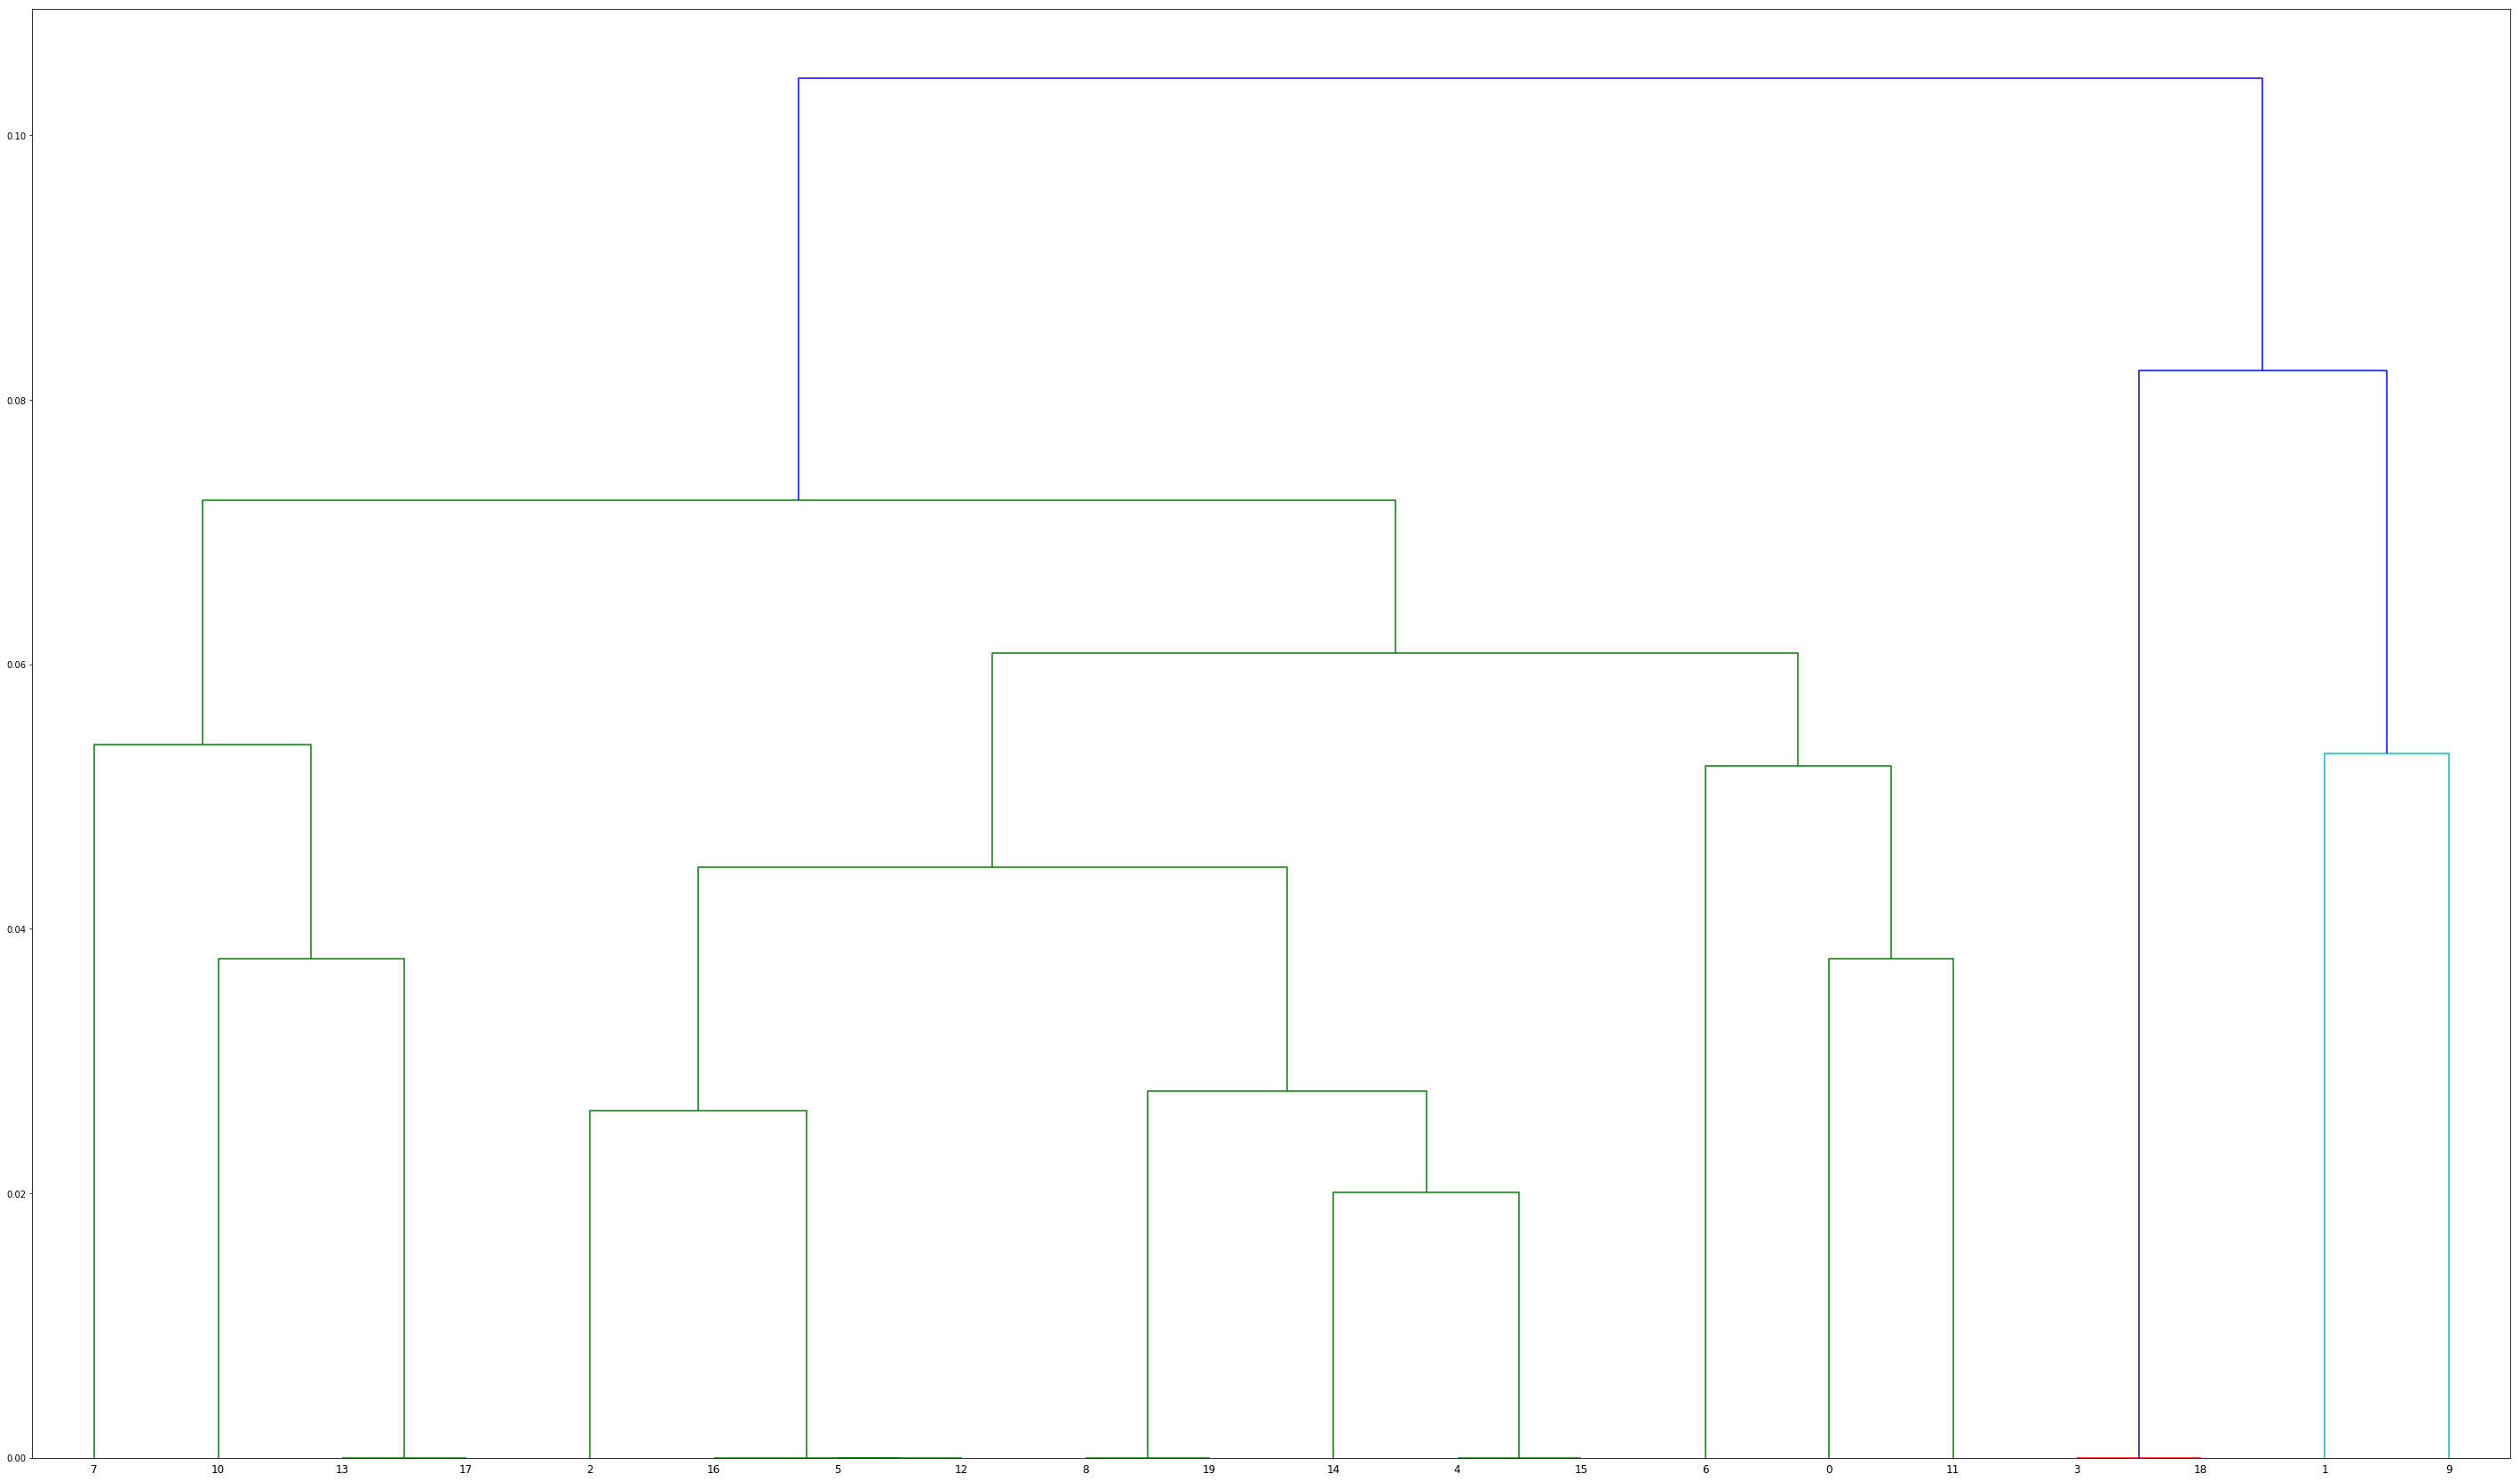

In [6]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
dists= pdist(data, metric='cosine') 
metric='euclidian'
links = linkage(dists, method='average')
plt.figure(figsize=(50,30))
den=dendrogram(links)

In [7]:
#looking at the rightmost cluster as a whole
print(data.iloc[3])
print(data.iloc[18])
print(data.iloc[1])
print(data.iloc[9])

war    1.0
fly    1.0
ver    1.0
end    1.0
gro    1.0
hai    2.0
Name: 3, dtype: float64
war    1.0
fly    1.0
ver    1.0
end    1.0
gro    1.0
hai    2.0
Name: 18, dtype: float64
war    1.0
fly    2.0
ver    1.0
end    1.0
gro    2.0
hai    2.0
Name: 1, dtype: float64
war    1.0
fly    2.0
ver    1.0
end    1.0
gro    1.0
hai    1.0
Name: 9, dtype: float64


All cold-blooded, makes sense.

In [8]:
print(len(data['war']==2))
data[data['war']==2]

20


,war,fly,ver,end,gro,hai
2,2,1,2,1.0,1.0,2
4,2,1,2,2.0,2.0,2
5,2,1,2,1.0,2.0,2
6,2,2,2,1.0,2.0,1
7,2,2,2,2.0,1.0,1
8,2,1,2,2.0,2.0,1
12,2,1,2,1.0,2.0,2
15,2,1,2,2.0,2.0,2
16,2,1,2,1.0,2.0,2
19,2,1,2,2.0,2.0,1


Nope, there aren't as many warm-blooded individuals as there are individuals in the left branch. I don't think this technique uses blood type as it's primary feature, but I'm not very comfortable with this technique and have a hard time analyzing it, so I could be wrong.

In [166]:
#entire right branch
#left side of right branch
print(data.iloc[3])
print(data.iloc[18])
#right side of right branch
print(data.iloc[1])
print(data.iloc[9])

war    1.0
fly    1.0
ver    1.0
end    1.0
gro    1.0
hai    2.0
Name: 3, dtype: float64
war    1.0
fly    1.0
ver    1.0
end    1.0
gro    1.0
hai    2.0
Name: 18, dtype: float64
war    1.0
fly    2.0
ver    1.0
end    1.0
gro    2.0
hai    2.0
Name: 1, dtype: float64
war    1.0
fly    2.0
ver    1.0
end    1.0
gro    1.0
hai    1.0
Name: 9, dtype: float64


Overall, this cluster is cold-blooded invertebrates that are not endangered. [3] and [18] are the exact same as far as features go. If I'm reading my pre-cleaned data right it's a caterpillar and a spider (no thank you) but they're earthbound antisocial unendangered (tragically) hairy insects. The only difference between them and the other cluster of [1] and [9] are that the later two can fly, being a bee and a fly (how ironic). 

English is a terrible language to write this analysis in.

### Agglomerative Clustering

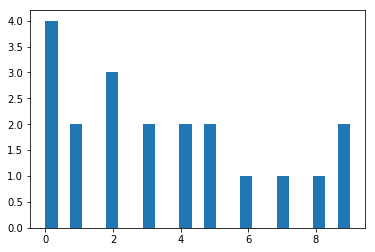

In [167]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=10)
arr = clusters.fit_predict(data[['war', 'fly', 'ver', 'end', 'gro', 'hai']])

data['cluster'] = arr

data.sort_values('cluster')
_ = plt.hist(data['cluster'], 25)

For this nice small dataset (thank you thank you thank you for that by the way), a tree probably isn't a bad way to visualize how the clusters are split up.

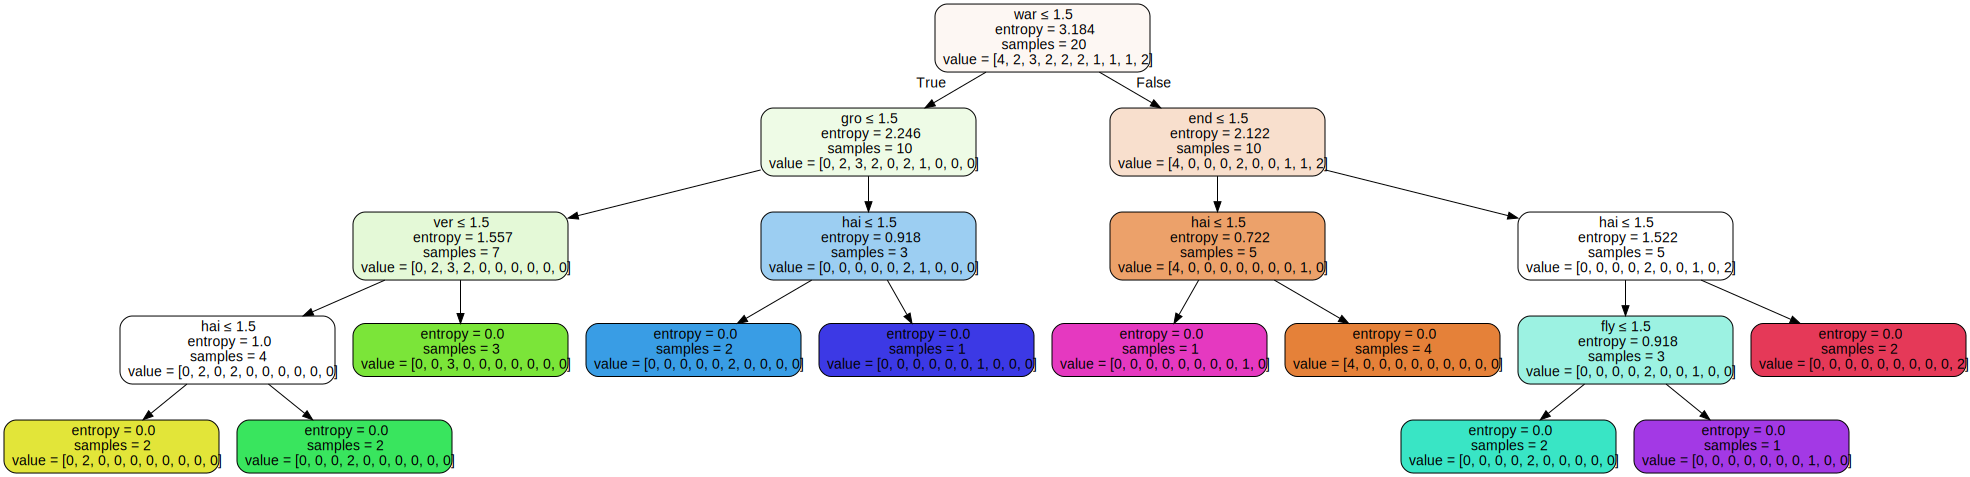

In [168]:
X = data.loc[:, data.columns != 'cluster']
Y= data['cluster']
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

So the clusters are primarily split by this algorithm at warmblooded, which seems reasonable. More indepth analysis of each cluster below.

In [169]:
import numpy as np
np.sort(data['cluster'])

array([0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7, 8, 9, 9])

**Clusters by size**
* 0: 4 Individuals
* 2: 3 Individuals
* 1, 3, 4, 5, and 9: 2 Individuals
* 6, 7, and 8: 1 Individual
    
Let's look at the two largest clusters first.

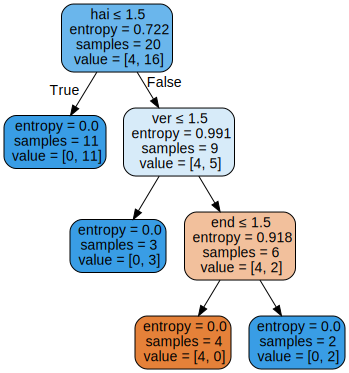

In [170]:
from sklearn import tree
#it's a pain to have to manipulate my target feature every time I want a graph, but it works
data['cluster'] = data.apply(lambda x: 0 if x['cluster'] ==0
                             else 1, axis = 1)
X = data.loc[:, data.columns != 'cluster']
Y= data['cluster']
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [126]:
#and because I bunched all my other clusters making my tree, I have to do everything over again to look at the data
data = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-10/master/animals.csv')
data = data.fillna(1)
del data['Unnamed: 0']
clusters = AgglomerativeClustering(n_clusters=10)
arr = clusters.fit_predict(data[['war', 'fly', 'ver', 'end', 'gro', 'hai']])

data['cluster'] = arr

data.sort_values('cluster')

#note: 'feature'==1 means it is false
print('Largest Clusters:')
print(data[data['cluster']==0])
print(data[data['cluster']==2])

Largest Clusters:
    war  fly  ver  end  gro  hai  cluster
2     2    1    2  1.0  1.0    2        0
5     2    1    2  1.0  2.0    2        0
12    2    1    2  1.0  2.0    2        0
16    2    1    2  1.0  2.0    2        0
    war  fly  ver  end  gro  hai  cluster
10    1    1    2  2.0  1.0    1        2
13    1    1    2  1.0  1.0    1        2
17    1    1    2  1.0  1.0    1        2


**Largest Clusters Analysis**

Cluster 0 consists of warm-blooded unendangered non-flying vertebrate creaturs with hair.

* [2] - cat
* [5] - cow
* [12] - lion
* [16] - rabbit

Cluster 2 consists of cold-blooded, hairless, earthbound vertebrates. Sounds like a delightful bunch.

* [10] - frog
* [13] - lizard
* [17] - salamander(?)

*Note:* I could very well generate classification trees for all 10 of my clusters, but if I do that I'll probably be here until the spring semester starts.

In [127]:
print('Midsize Clusters:')
print(data[data['cluster']==1])
print(data[data['cluster']==3])
print(data[data['cluster']==4])
print(data[data['cluster']==5])
print(data[data['cluster']==9])

Midsize Clusters:
    war  fly  ver  end  gro  hai  cluster
9     1    2    1  1.0  1.0    1        1
14    1    1    1  1.0  1.0    1        1
    war  fly  ver  end  gro  hai  cluster
3     1    1    1  1.0  1.0    2        3
18    1    1    1  1.0  1.0    2        3
    war  fly  ver  end  gro  hai  cluster
8     2    1    2  2.0  2.0    1        4
19    2    1    2  2.0  2.0    1        4
    war  fly  ver  end  gro  hai  cluster
0     1    1    1  1.0  2.0    1        5
11    1    1    2  1.0  2.0    1        5
    war  fly  ver  end  gro  hai  cluster
4     2    1    2  2.0  2.0    2        9
15    2    1    2  2.0  2.0    2        9


**Midsize Clusters Analysis**

Cluster 1: Cold-blooded invertebrates who aren't endangered, don't live in groups, and don't have hair. You could call this the not cluster, because every feature they have is not, (~end, ~war, etc).
* [9] - fly
* [14] - lobster(?)

Cluster 3: Cold-blooded earthbound unendangered invertebrates that don't live in groups but do have hair.
* [3] - caterpillar
* [18] - spider

Cluster 4: Warm-blooded earthbound endangered vertebrates that don't have hair, but are endangered and do live in groups.

* [8] - elephant(?)
* [19] - whale(?)

Cluster 5: Cold-blooded earthbound unendangered hairless heard animals.

* [0] - ant
* [11] - no idea what animall 'her' is refering to, could be a heron except it doesn't fly, could be a hermit crab except it's an invertebrate.

Cluster 9: Warm-blooded earthbound endangered heard animal vertebrates with hair.

* [4] - chicken(?)
* [15] - manatee(?)

In [128]:
print(data[data['cluster']==6])
print(data[data['cluster']==7])
print(data[data['cluster']==8])

   war  fly  ver  end  gro  hai  cluster
1    1    2    1  1.0  2.0    2        6
   war  fly  ver  end  gro  hai  cluster
7    2    2    2  2.0  1.0    1        7
   war  fly  ver  end  gro  hai  cluster
6    2    2    2  1.0  2.0    1        8


**Smallest Clusters**

Cluster 6: One hairy social cold-blooded unendangered flying invertebrate.

* [1] - bee

Cluster 7: One warm-blooded endangered flying vertebrate with no hair.

* [7] - eagle


Cluster 8: Warm-blooded flying hairless social vertebrate that is not endangered.

* [6] - duck


*Note:* There's a more in-depth discussion of the animals in these clusters in the next section.

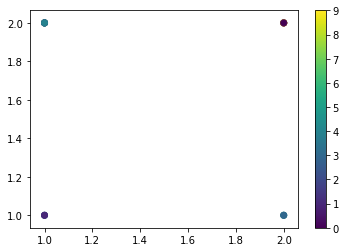

In [129]:
#I'm just going to look at scatter plots because I can
plt.scatter(data['hai'], data['ver'], c=arr)
plt.colorbar()
#huh, literally no middle ground here, but that makes sense because we only have two values possible

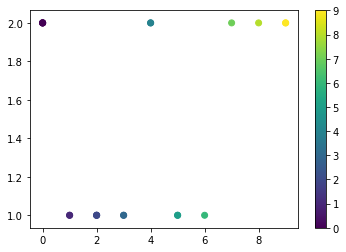

In [131]:
plt.scatter(data['cluster'], data['war'], c=arr)
plt.colorbar()

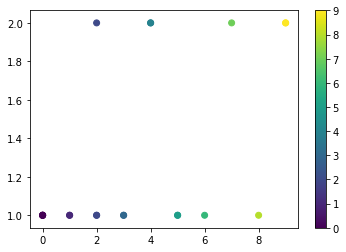

In [132]:
plt.scatter(data['cluster'], data['end'], c=arr)
plt.colorbar()

Goodness, how many ways are there to visualize this stuff? 

### KMeans Classifier

In [148]:
from sklearn.cluster import KMeans
model = KMeans(10)
model.fit(data)
clusters=model.predict(data)
data['cluster']=clusters
data.head()

,war,fly,ver,end,gro,hai,cluster
0,1,1,1,1.0,2.0,1,7
1,1,2,1,1.0,2.0,2,5
2,2,1,2,1.0,1.0,2,2
3,1,1,1,1.0,1.0,2,0
4,2,1,2,2.0,2.0,2,8


In [149]:
data.groupby('cluster').size()

cluster
0    2
1    2
2    4
3    2
4    3
5    1
6    1
7    2
8    2
9    1
dtype: int64

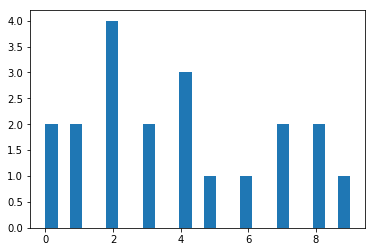

In [150]:
_ = plt.hist(data['cluster'], 25)

**Clusters by size**

* 2: 4 individuals
* 4: 3 individuals
* 0, 1, 3, 7, and 8: 2 individuals
* 5, 6, and 9: 1 individual

We can see that KMeans makes very differently sized clusters than Agglomerative Clustering.

However, similarly to the previous technique there is one cluster with 4 individuals, one with 3, five with 2, and three with 1. The indexes have simply changed.

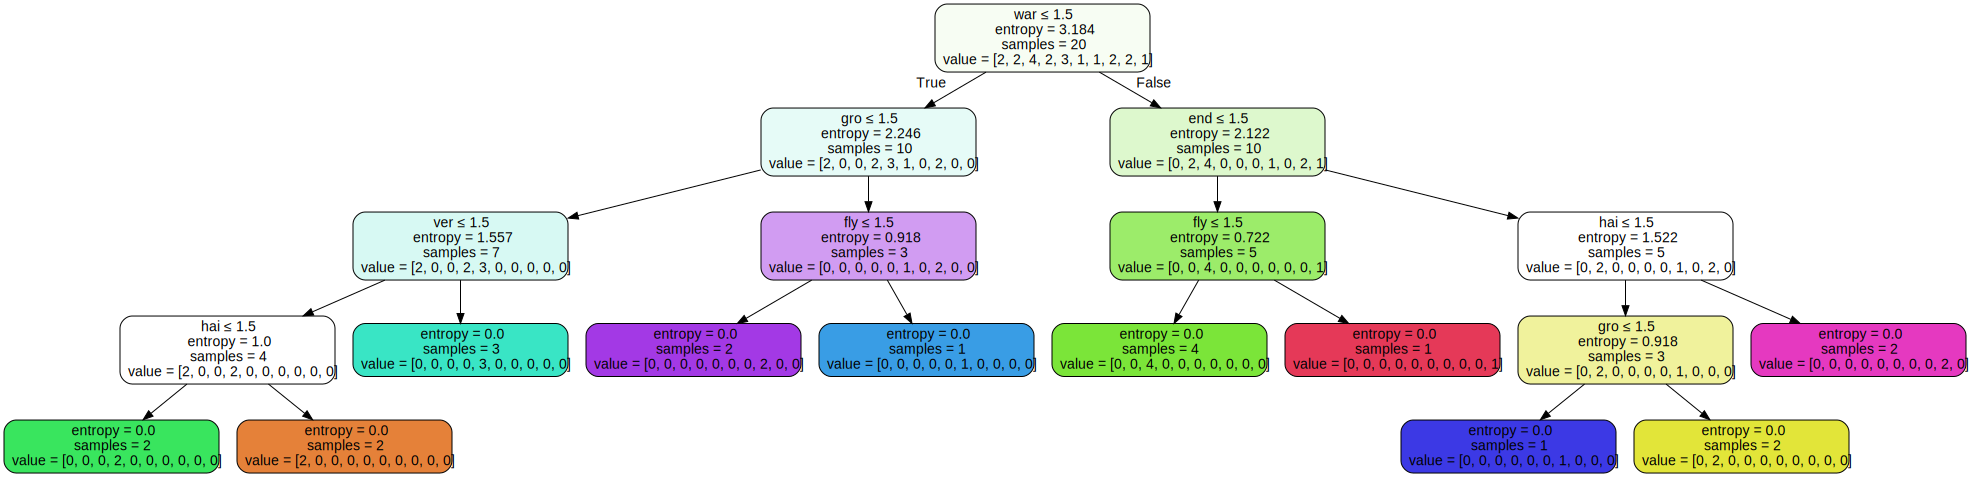

In [153]:
X = data.loc[:, data.columns != 'cluster']
Y= data['cluster']
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

So KMeans differs from Agglomerative at the third level. While they both use warm-blooded as the primary feature to cluster individuals by, and cold-blooded creatures are then split by socialability but after that it looks at fligth abilities, not whether 'hai' like in the previous technique.



In [157]:
print('Largest Clusters:')
print(data[data['cluster']==2])
print(data[data['cluster']==4])

Largest Clusters:
    war  fly  ver  end  gro  hai  cluster
2     2    1    2  1.0  1.0    2        2
5     2    1    2  1.0  2.0    2        2
12    2    1    2  1.0  2.0    2        2
16    2    1    2  1.0  2.0    2        2
    war  fly  ver  end  gro  hai  cluster
10    1    1    2  2.0  1.0    1        4
13    1    1    2  1.0  1.0    1        4
17    1    1    2  1.0  1.0    1        4


**Largest Clusters**

Same features as the previous technique.

Cluster 2: warm-blooded unendangered non-flying vertebrate creaturs with hair. 

* [2] - cat
* [5] - cow
* [12] - lion
* [16] - rabbit

So these are the mammals.

Cluster 4: cold-blooded, hairless, antisocial earthbound vertebrates.

* [10] - frog
* [13] - lizard
* [17] - salamander(?)

These are the reptiles/amphibians.

In [156]:
print('Midsize Clusters:')
print(data[data['cluster']==0])
print(data[data['cluster']==1])
print(data[data['cluster']==3])
print(data[data['cluster']==7])
print(data[data['cluster']==8])

Midsize Clusters:
    war  fly  ver  end  gro  hai  cluster
3     1    1    1  1.0  1.0    2        0
18    1    1    1  1.0  1.0    2        0
    war  fly  ver  end  gro  hai  cluster
8     2    1    2  2.0  2.0    1        1
19    2    1    2  2.0  2.0    1        1
    war  fly  ver  end  gro  hai  cluster
9     1    2    1  1.0  1.0    1        3
14    1    1    1  1.0  1.0    1        3
    war  fly  ver  end  gro  hai  cluster
0     1    1    1  1.0  2.0    1        7
11    1    1    2  1.0  2.0    1        7
    war  fly  ver  end  gro  hai  cluster
4     2    1    2  2.0  2.0    2        8
15    2    1    2  2.0  2.0    2        8


**Midsize Clusters**

Cluster 0: Cold-blooded invertebrates who aren't endangered, don't live in groups, and have hair.
* [3] - caterpillar
* [18] - spider

Sadly not endangered insects.

Cluster 1: Warm-blooded earthbound endangered vertebrates that live in groups but do have hair.
* [8] - elephant(?)
* [19] - whale(?)

Endangered mammals.

Cluster 3: Cold-blooded unendangered anti-social invertebrates that don't have hair.

* [9] - fly
* [14] - lobster(?)
Sea creature (if 14 is actually a lobster) vs air creature, what an odd combination.

Cluster 7: Cold-blooded earthbound unendangered hairless heard animals.
* [0] - ant
* [11] - no idea what animal 'her' is refering to, could be a heron except it doesn't fly and is coldblooded, could be a hermit crab except it's a vertebrate.

No idea what to call this classification.

Cluster 8: Warm-blooded earthbound endangered social vertebrates with hair.
* [4] - chicken(?)
* [15] - manatee(?)

If I'm right about these two, that doesn't make any sense.


Similar to, but not exactly the same organiation as the midsize clusters in Agglomerative Clustering, just a few minute differences in cluster assignment. All the animals are still the same.

In [158]:
print('Smallest Clusters:')
print(data[data['cluster']==5])
print(data[data['cluster']==6])
print(data[data['cluster']==9])

Smallest Clusters:
   war  fly  ver  end  gro  hai  cluster
1    1    2    1  1.0  2.0    2        5
   war  fly  ver  end  gro  hai  cluster
7    2    2    2  2.0  1.0    1        6
   war  fly  ver  end  gro  hai  cluster
6    2    2    2  1.0  2.0    1        9


**Smallest Clusters**

Cluster 5: One hairy social cold-blooded unendangered flying invertebrate.
* [1] - bee

Cluster 6: One warm-blooded endangered flying vertebrate with no hair.

* [7] - eagle

Cluster 9: Warm-blooded flying hairless social vertebrate that is not endangered.

* [6] - duck

Exact same features/animals as smallest clusters in previous technique. These animals don't seem all that dissimilar to others I can think of, or even others in the dataset, it's interesting that they got their own clusters.

### Conclusion

Given the small number of instances and the few features in this dataset, the clustering techniques here were pretty different from how I would group these animals together, or maybe the algorithm just groups differently reguardless. In both of the last two techniques, the largest groups are mammals and reptiles/amphibians, which makes a lot of sense, but once you get on a smaller level the logic seems to go. Maybe it's just because I can't decipher the three letter animal names well (which is highly probable).

It wasn't until I went back and actually connected the animal names to their indexes that the clusters started making sense. Prior to that it was all just features and 1s and 2s (which is a pain when you're used to dealing with 0s and 1s). Understanding which animals were in each cluster brought it back to a bigger picture scale though which was easier for me to understand.

Initially, I cleaned the name catagory as we've usually cleaned strings, just turning it into a catagory. However once I started generating trees I noticed that the algorithms were factoring in this feature in they're classification, which was not my intention. So I deleted it and that drastically changed my dendrogram.

For the last two techniques, I could have generated classification trees to understand exactly how the clusters were broken down. This would have required me (with my limited skills) to reload, clean, and recluster the data each time I wanted to look at another cluster, and with 10 clusters in each of the last two techniques I couldn't bring myself to do that. 

I had no idea there were so many ways to visualize this classification, and I'm so glad this was a small dataset we got to work with. The dendrogram looks lovely, but for me it was the most difficult to deal with because I dont' know how to turn the clusters it made into a new feature.

Unsupervised methods are very interesting. Conceptually they're certainly a change of pace from what we've been doing all semester long. I'm glad we got to switch it up.